In [19]:
'''

                        LINES AND CIRCLES DETECTION IN EDGE DETECTED IMAGE USING HOUGH TRANSFORM 
                    
GUI :-
    
 Input      :    edge detected image / normal image
 Processing :    detecting lines / circles using hough transform
 Output     :    images of original image, edge image, hough transform ,detected image



'''    

'\n\n                        LINES AND CIRCLES DETECTION IN EDGE DETECTED IMAGE USING HOUGH TRANSFORM \n                    \nGUI :-\n    \n Input      :    edge detected image / normal image\n Processing :    detecting lines / circles using hough transform\n Output     :    images of original image, edge image, hough transform ,detected image\n\n\n\n'

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from collections import defaultdict
import tkinter as tk
from tkinter import *
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
import os

In [21]:
path = os.getcwd()
print(path)

C:\Users\kamar


In [22]:
# Alogrithm for line detection

def line_detection(filename,num_rhos=180, num_thetas=180):
  
  # Getting image from filepath
  image = cv2.imread(filename)

  # Gray conversion
  edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Blurring image for perfect edge detection
  edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)

  # Edge detection 
  edge_image = cv2.Canny(edge_image, 100, 200)

  # Closing operation to fill small gaps
  edge_image = cv2.dilate(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),iterations=1)
  edge_image = cv2.erode(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),iterations=1)
  
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
    
  # Finding the max perpendicular distance i.e diagonal
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  
  # Step size for dicretising the accumulator cells
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
    
  # Axes for accumulator
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)

  # Cosine and Sine values for using in the equation
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
    
  # Accumulator array
  accumulator = np.zeros((len(rhos), len(rhos)))
    
  # plotting
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
    
  # Converting into parameter transform and modifying accumulator 
  for y in range(edge_height):
    for x in range(edge_width):
        
      # Apply only if pixel is part of edge
      if edge_image[y][x] != 0:
        
        # Shifting axis to the center for using in the parametric equation
        edge_point = [y - edge_height_half, x - edge_width_half]
        
        ys, xs = [], []
        
        # Varying thetas and finding rhos to plot the parametric graph and increment accumulator 
        for theta_idx in range(len(thetas)):
            
          # Parametric equation
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
            
          theta = thetas[theta_idx]
        
          # Finding rho index of the rho we got by the particular theta
          rho_idx = np.argmin(np.abs(rhos - rho))
        
          # Incrementing accumulator
          accumulator[rho_idx][theta_idx] += 1
          
          # Appending parameter graph
          ys.append(rho)
          xs.append(theta)
        
        # Ploting parameter graph
        subplot3.plot(xs, ys, color="white", alpha=0.05)
   
  # Threshold for acuumulator value
  t_count =  np.amax(accumulator)//2
  if t_count<=60:
        t_count = 60
        

  list2=[]
  

  # Finding proper values of rho , theta which represent lines

  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        list2.append([y,x])
  x = 0
  list3=[]
  k = 0
  while  x!= len(list2) :
    y = x+1
    last = []
    last.append(list2[x])
    while  y!=len(list2) :
        if ((list2[y][0]-list2[x][0]>10) | (list2[y][0]-list2[x][0]<-10) |  (list2[y][1]-list2[x][1]>10) | (list2[y][1]-list2[x][1]<-10)):
            x = y
            k = 0
            break
        else :
            last.append(list2[y])
            y = y+1
            k = 1
    list3.append(last)
    if k==1 :
        break
  c =[]
  for p in list3:
    d = []
    for q in  p :
        d.append(accumulator[q[0]][q[1]])
    maxvalue = max(d)
    indexvalue  = d.index(maxvalue)
    c.append(p[indexvalue])
    
        
    
  # Drawing lines with the rho and theta we got    
  for final in c:
    y = final[0]
    x = final[1]
    rho = rhos[y]
    theta = thetas[x]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    
    # Finding mid point x,y from and reshifting the axis
    x0 = (a * rho) + edge_width_half
    y0 = (b * rho) + edge_height_half
    
    # Calculating 2 point i.e extreme ends
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    
    # Ploting lines on the original image
    subplot3.plot([theta], [rho], marker='o', color="yellow")
    subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))
    
    
  # Ploting
  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  #return accumulator, rhos, thetas
  
  # saving sub plots  
  extent = subplot1.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('a.png', bbox_inches=extent)
    
  extent = subplot2.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('b.png', bbox_inches=extent)
    
  extent = subplot3.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('c.png', bbox_inches=extent)

  extent = subplot4.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('d.png', bbox_inches=extent)

  
  # GUI for representing output images
    
  greeting1 = tk.Text(window,foreground="white",background="black",width=1400,height=2)
  greeting1.insert(tk.END,"    Original Image        Edge Image         Hough Transform          Lines detected  ")
  greeting1.config(font=("Courier", 20))
  greeting1.place(x=50, y=260,width=1400,height=50)
  

  load = Image.open("a.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=50, y=300,width=350,height=350)

  load = Image.open("b.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=400, y=300,width=350,height=350)

  load = Image.open("c.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=750, y=300,width=350,height=350)

  load = Image.open("d.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=1100, y=300,width=350,height=350)


In [23]:
# Algorithm for detecting circles
def circle_detection(filename):
  
  # Loading image from filename
  image = cv2.imread(filename)

  # Gray conversion
  edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Blurring image for perfect edge detection
  edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)

  # Edge detection 
  edge_image = cv2.Canny(edge_image, 100, 200)

  # Closing operation to fill small gaps
  #edge_image = cv2.dilate(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),iterations=1)
  #edge_image = cv2.erode(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),iterations=1)
  edge_height, edge_width = edge_image.shape[:2]
  
    
  # Finding the max radius i.e diagonal
  d = int(np.sqrt(np.square(edge_height) + np.square(edge_width)))
    
    
  
  # Step size for dicretising the accumulator cells
  hstep = edge_width//60
  kstep =  edge_height//60
  rstep = d//50
    
  # Dicretising
  hs = np.arange(0,edge_width, step=hstep)
  ks = np.arange(0,edge_height, step=kstep)
  rs = np.arange(0,d, step=rstep)
    
  # Accumulator dictionery
  accumulator = defaultdict(float)
    
  # plotting
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3 , projection='3d')
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
    
  # Converting into parameter transform and modifying accumulator 
  for y in range(edge_height):
    for x in range(edge_width):
        
      # Apply only if pixel is part of edge
      if edge_image[y][x] != 0:
            
        hlist, klist, rlist = [], [],[]
        
        for h in hs:
            for k in ks:
                
                r = int(np.sqrt(np.square(x-h) + np.square(y-k)))
                r_idx = np.argmin(np.abs(rs - r))
                rfinal = rs[r_idx]
                if rfinal!=0:
                    if rfinal>=15:
                        accumulator[(h,k,rfinal)] = accumulator[(h,k,rfinal)] + (1/(2*(3.14)*rfinal))
              # Appending parameter graph
                hlist.append(h)
                klist.append(k)
                rlist.append(r)
                
        # Ploting parameter graph
        subplot3.plot(hlist, klist,rlist, color="white", alpha=0.05)
   
  # Threshold for acuumulator value
  t_count = max(accumulator.values())*0.98

 
  # Finding circles
  final_list=[]
  for key, value in accumulator.items():
    if value >= t_count:
        final_list.append(key)
        
  


  # Drawing line with the center and radius we got    
  for final in final_list:
    hfinal = final[0]
    kfinal = final[1]
    rfinal = final[2]

    # Ploting lines on the original image
    subplot3.plot(hfinal,kfinal,rfinal, marker='o', color="yellow")
    circle1 = plt.Circle((hfinal,kfinal),rfinal, color='green', fill=False)
    subplot4.add_artist(circle1)
    
    
  # Ploting
  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()

  
  # saving subplots
  extent = subplot1.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('a.png', bbox_inches=extent)
    
  extent = subplot2.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('b.png', bbox_inches=extent)
    
  extent = subplot3.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('c.png', bbox_inches=extent)

  extent = subplot4.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
  figure.savefig('d.png', bbox_inches=extent)

  # GUI for displaying output
  greeting1 = tk.Text(window,foreground="white",background="black",width=1400,height=2)
  greeting1.insert(tk.END,"    Original Image        Edge Image         Hough Transform          Circles detected  ")
  greeting1.config(font=("Courier", 20))
  greeting1.place(x=50, y=260,width=1400,height=50)
  

  load = Image.open("a.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=50, y=300,width=350,height=350)

  load = Image.open("b.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=400, y=300,width=350,height=350)

  load = Image.open("c.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=750, y=300,width=350,height=350)

  load = Image.open("d.png")
  load1 = load.resize((350,350))
  render = ImageTk.PhotoImage(load1)
  img = Label(image=render)
  img.image = render
  img.place(x=1100, y=300,width=350,height=350)


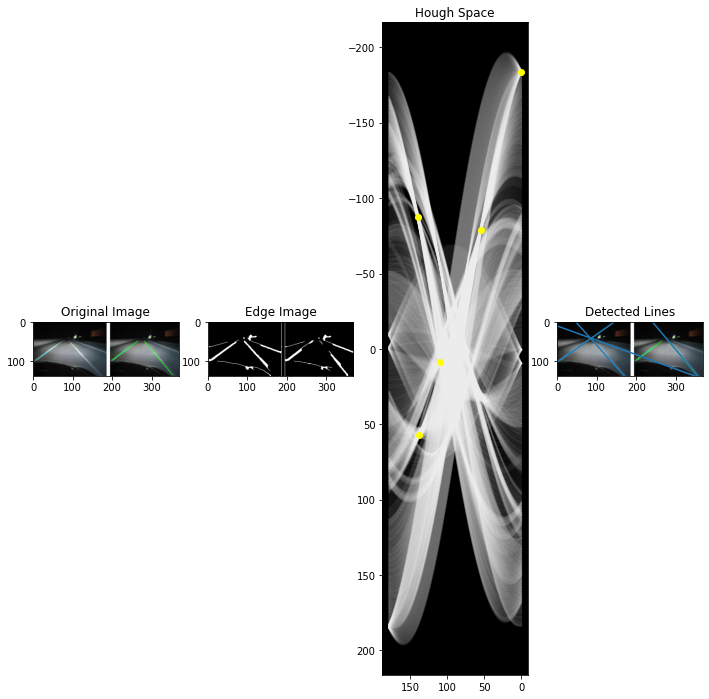

In [24]:
# GUI

window = tk.Tk()
window.geometry('1000x1000')
greeting = tk.Label(text="Lines and Circles Detector",foreground="white",background="#34A2FE",width=1000,height=2)
greeting.config(font=("Courier", 44))
greeting.pack()

s = ""

def open_file():
    file = askopenfile(mode ='r', filetypes =[("Image files","*.*")])
    global s
    s = file.name

        
def changeOnHover(button, colorOnHover, colorOnLeave):
    button.bind("<Enter>", func=lambda e: button.config(background=colorOnHover))
    button.bind("<Leave>", func=lambda e: button.config(background=colorOnLeave))
  
btn1 = tk.Button(window, text ='CHOOSE FILE', relief=RAISED, command = lambda:open_file(),bg ='gray87',font=('Courier',15))
changeOnHover(btn1, "powder blue", "gray87")
btn1.pack(side = LEFT, pady = 20)
btn1.place(x=150, y=150,width=200,height=100)

btn2 = tk.Button(window, text ='DETECT LINES', relief=RAISED, command = lambda:line_detection(s),bg ='gray87',font=('Courier',15))
changeOnHover(btn2, "powder blue", "gray87")
btn2.pack(side = TOP, pady = 20)
btn2.place(x=700, y=150,width=200,height=100)

btn3 = tk.Button(window, text ='DETECT CIRCLES', relief=RAISED, command = lambda:circle_detection(s),bg ='gray87',font=('Courier',15))
changeOnHover(btn3, "powder blue", "gray87")
btn3.pack(side = TOP, pady = 20)
btn3.place(x=1250, y=150,width=200,height=100)

greeting1 = tk.Text(window,foreground="white",background="black",width=1400,height=2)
greeting1.insert(tk.END,"             It takes time , please Wait for the results after pressing detection ")
greeting1.config(font=("Courier", 20))
greeting1.place(x=50, y=300,width=1400,height=50)

       
mainloop()